# IMPORT LIBRARY

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Cleaning
# Subtitusi nilai
from sklearn.impute import SimpleImputer 

# Import KMeans Clustering
from sklearn.cluster import KMeans

# Import Hierarchical Clustering 
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, complete

# Import untuk menghilangkan warning 
import warnings
warnings.filterwarnings('ignore')

# Membaca File CSV

In [2]:
dataset = pd.read_csv('Car_sales.csv')
dataset.head()

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [4]:
#Menggunakan strategy modus/most frequent

imputer_modus = SimpleImputer(strategy='most_frequent')

print(f'Jumlah record yang memiliki nilai null :')
print(dataset.isna().sum())

Jumlah record yang memiliki nilai null :
Manufacturer            0
Model                   0
Sales_in_thousands      0
__year_resale_value    36
Vehicle_type            0
Price_in_thousands      2
Engine_size             1
Horsepower              1
Wheelbase               1
Width                   1
Length                  1
Curb_weight             2
Fuel_capacity           1
Fuel_efficiency         3
Latest_Launch           0
Power_perf_factor       2
dtype: int64


In [5]:
dataset[['__year_resale_value', 'Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']] = imputer_modus.fit_transform(dataset[['__year_resale_value', 'Price_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor']])
print(f'Jumlah record setelah menggunakan fungsi SimpleImputer :')
print(dataset.isna().sum())

Jumlah record setelah menggunakan fungsi SimpleImputer :
Manufacturer           0
Model                  0
Sales_in_thousands     0
__year_resale_value    0
Vehicle_type           0
Price_in_thousands     0
Engine_size            0
Horsepower             0
Wheelbase              0
Width                  0
Length                 0
Curb_weight            0
Fuel_capacity          0
Fuel_efficiency        0
Latest_Launch          0
Power_perf_factor      0
dtype: int64


In [6]:
dataset.duplicated().sum()

0

# KMeans Clustering

In [7]:
# Membuat objek model
model = KMeans(n_clusters = 3)

# Memilih atribut yang ingin dilatih
dataset["Vehicle_type"] = dataset.Vehicle_type
points = dataset[["Price_in_thousands","Sales_in_thousands"]]

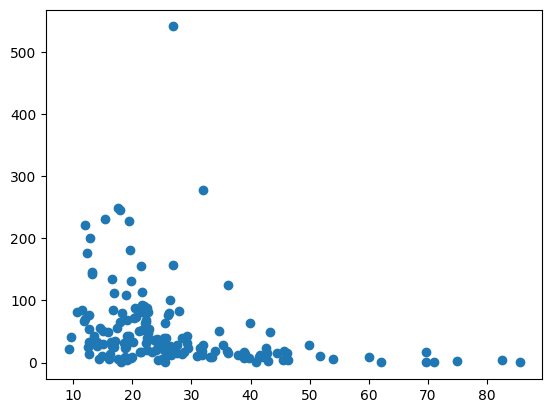

In [8]:
plt.scatter(points['Price_in_thousands'], points['Sales_in_thousands'])

# KMeans Model


In [9]:
model = KMeans(n_clusters = 3)

In [10]:
model.fit(points)

KMeans(n_clusters=3)

In [11]:
labels = model.labels_

In [12]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0])

In [13]:
ds_KMeans = pd.DataFrame({
    'labels': labels,
    'Vehicle_type': dataset.Vehicle_type
})

In [14]:
# Membuat Crosstab
crosstab = pd.crosstab(ds_KMeans['labels'], ds_KMeans['Vehicle_type'])
crosstab

Vehicle_type,Car,Passenger
labels,,
0,32,105
1,8,11
2,1,0


In [15]:
centroid = model.cluster_centers_
centroid

array([[ 28.32453285,  32.47259124],
       [ 19.129     , 175.33642105],
       [ 26.935     , 540.561     ]])

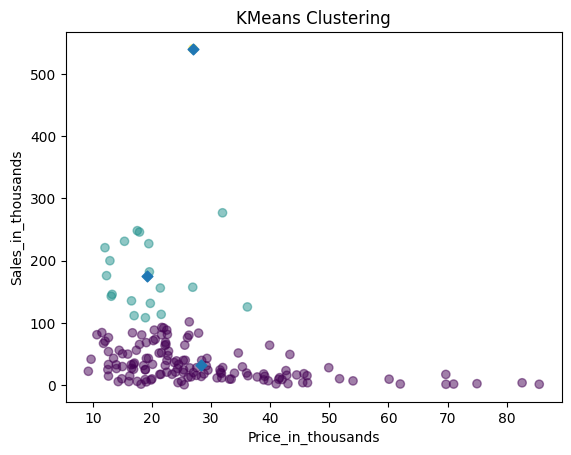

In [16]:
# Membuat grafik Kmeans dengan centroid
plt.scatter(points['Price_in_thousands'], points['Sales_in_thousands'], alpha = .5, c = labels)
plt.scatter(centroid[:,0], centroid[:,1], marker = 'D', s = 30)
plt.title("KMeans Clustering")
plt.xlabel("Price_in_thousands")
plt.ylabel("Sales_in_thousands")
plt.show()

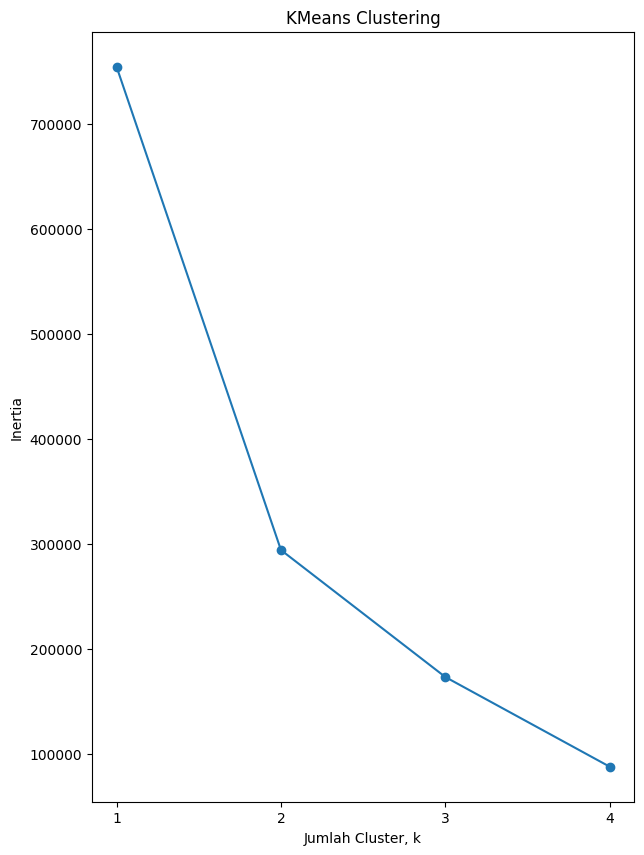

In [17]:
cluster_sum = range(1, 5)
inertia = []

for cluster in cluster_sum:
    model = KMeans(n_clusters = cluster)
    model.fit(points)
    inertia.append(model.inertia_)

plt.figure(figsize=(7,10))
plt.title("KMeans Clustering")
plt.plot(cluster_sum, inertia, '-o')
plt.xticks(cluster_sum)
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(cluster_sum)
plt.show()

# Hierarchical Clustering

In [18]:
# Mengabil baris n colom yang akan digunakan
points_linkage = dataset.iloc[:,[2,5,]].values
points_complete = dataset.iloc[:,[2,6,]].values

In [19]:
# Menentukan algoritma similarity yang digunakan
hr_linkage = linkage(points_linkage, method='ward')
hr_complete = complete(points_complete)

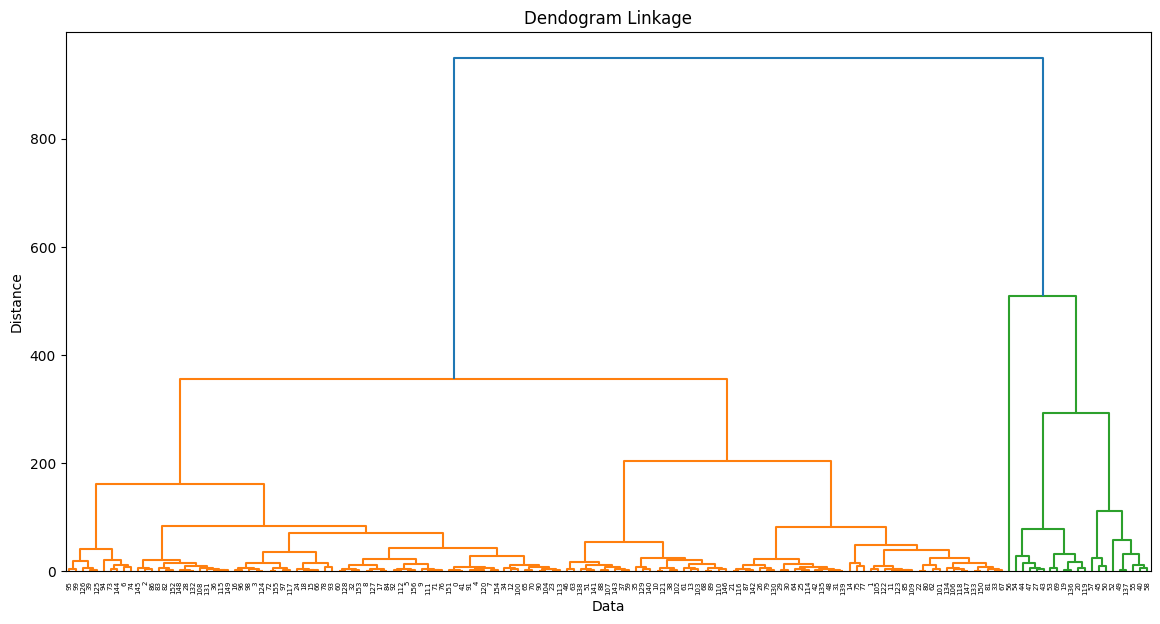

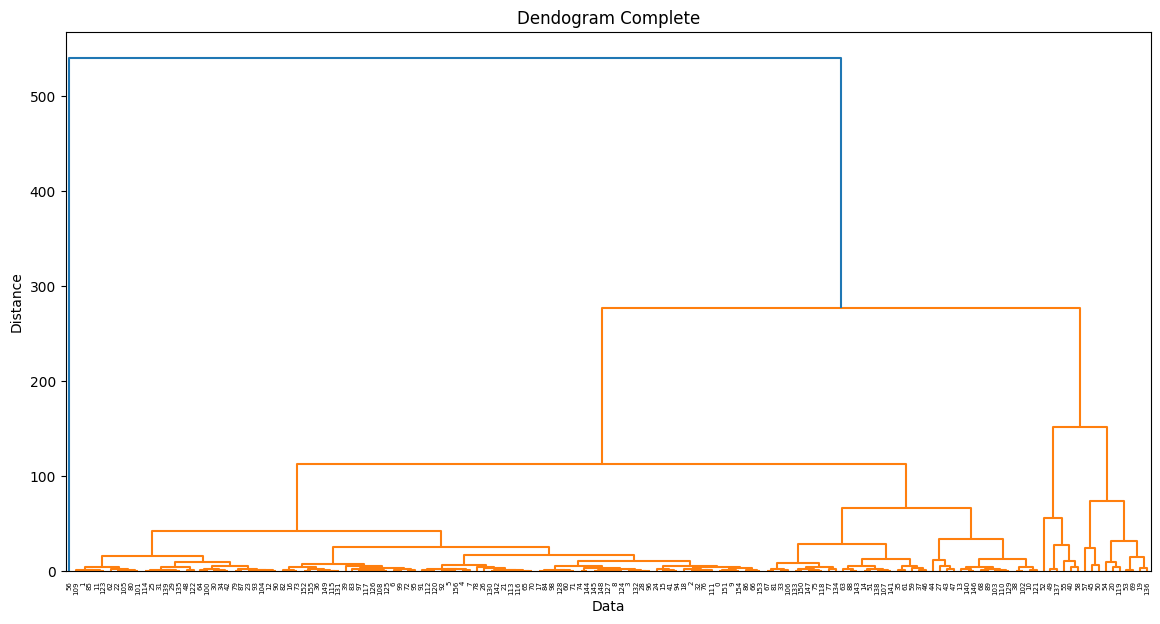

In [20]:
# Visualisasi hasil model Dendogram Linkage | Hierarchical Clustering
plt.figure(1, figsize=(14, 7))
dendrogram(hr_linkage)
plt.title('Dendogram Linkage')
plt.xlabel('Data')
plt.ylabel('Distance')

# Visualisasi hasil model Dendogram Complete | Hierarchical Clustering
plt.figure(2, figsize=(14, 7))
dendrogram(hr_complete)
plt.title('Dendogram Complete')
plt.xlabel('Data')
plt.ylabel('Distance')

plt.show()

In [21]:
# Menentukan jenis hierarchy yang digunakan
ag_linkage = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
ag_complete = AgglomerativeClustering(n_clusters=3, affinity='euclidean')

In [22]:
# Training model
pr_linkage = ag_linkage.fit_predict(points_linkage)
pr_complete = ag_complete.fit_predict(points_complete)

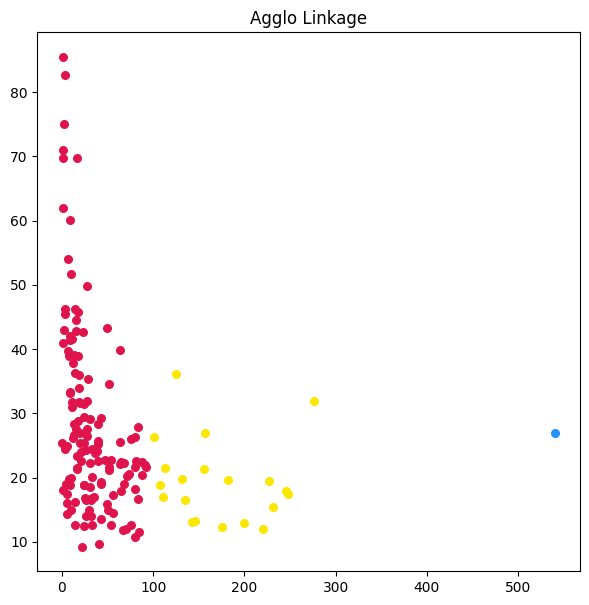

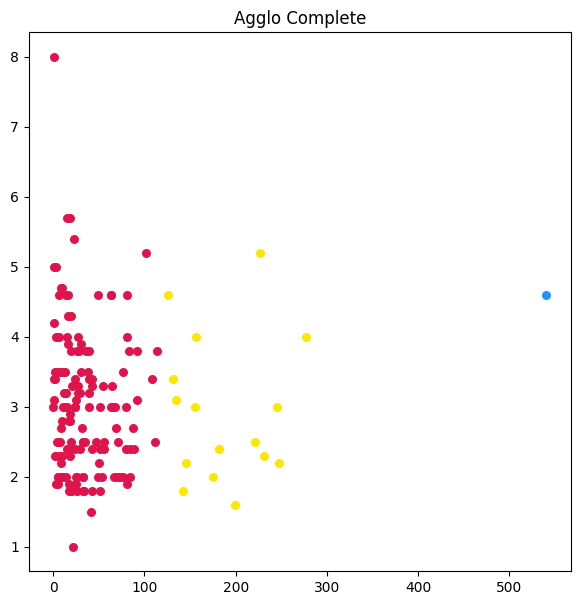

In [23]:
# Visualisasi hasil model Aggle Linkage | Hierarchical Clustering
plt.figure(1, figsize = (7,7))
plt.scatter(points_linkage[pr_linkage==0,0], points_linkage[pr_linkage==0,1], s=30, c='#E0144C')
plt.scatter(points_linkage[pr_linkage==1,0], points_linkage[pr_linkage==1,1], s=30, c='#FCE700')
plt.scatter(points_linkage[pr_linkage==2,0], points_linkage[pr_linkage==2,1], s=30, c='#2192FF')
plt.title('Agglo Linkage')

# Visualisasi hasil model Aggle Complete | Hierarchical Clustering
plt.figure(2, figsize = (7,7))
plt.scatter(points_complete[pr_complete==0,0], points_complete[pr_complete==0,1], s=30, c='#E0144C')
plt.scatter(points_complete[pr_complete==1,0], points_complete[pr_complete==1,1], s=30, c='#FCE700')
plt.scatter(points_complete[pr_complete==2,0], points_complete[pr_complete==2,1], s=30, c='#2192FF')
plt.title('Agglo Complete')

plt.show()